In [1]:
import umap
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import skfuzzy as fuzz
import statistics
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
import itertools

In [2]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.3.


In [3]:
digits = fetch_openml('mnist_784')


In [4]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      n_components=3,
                      metric='correlation').fit_transform(digits.data)

C:\Users\dipdx\Anaconda3\lib\site-packages\umap\nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\Anaconda3\lib\site-packages\umap\utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
C:\Users\dipdx\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\Anaconda3\lib\site-packages\umap\nndescent.py", line 4

In [5]:
embedding.shape

(70000, 3)

<IPython.core.display.Javascript object>


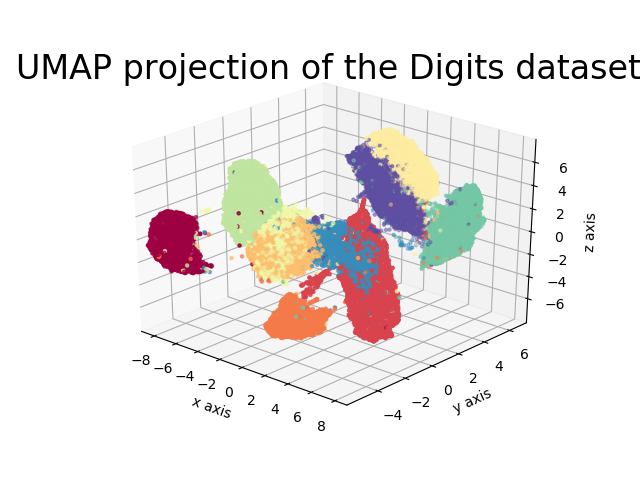

In [6]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1],embedding[:, 2], c=digits.target, cmap='Spectral', s=5)
ax.scatter(0, 0, 0, c='k', s=50)
plt.gca().set_aspect('equal', 'datalim')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);


In [7]:
min(embedding[:, 0])


-8.047977

In [8]:
embedding[:,0]=embedding[:,0]-min(embedding[:, 0])
embedding[:,1]=embedding[:,1]-min(embedding[:, 1])
embedding[:,2]=embedding[:,2]-min(embedding[:, 2])

<IPython.core.display.Javascript object>


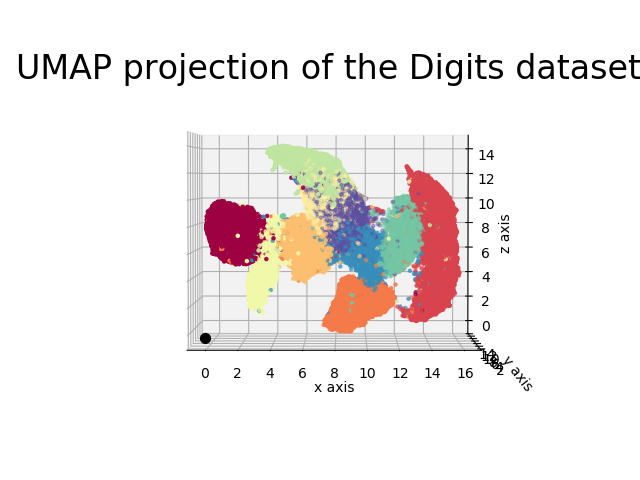

In [9]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1],embedding[:, 2], c=digits.target, cmap='Spectral', s=5)
ax.scatter(0, 0, 0, c='k', s=50)
plt.gca().set_aspect('equal', 'datalim')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);



In [10]:
embedding[0]

array([6.721948, 5.675715, 5.840176], dtype=float32)

In [11]:
import pandas as pd 

dataset = pd.DataFrame({'Column1': digits.target, 'Column2': embedding[:, 0], 'Column3': embedding[:, 1], 'Column4': embedding[:, 2]})
#dataset = pd.DataFrame(digits.target,embedding)

In [12]:
dataset

,Column1,Column2,Column3,Column4
0,5,6.721948,5.675715,5.840176
1,0,1.584558,1.158744,6.581607
2,4,5.900086,13.926442,12.355974
3,1,14.182188,6.854208,2.709179
4,9,8.506622,12.027730,8.491695
5,2,8.535588,4.764180,1.854134
6,1,13.625760,5.175361,10.950125
7,3,6.748569,6.099377,5.234687
8,1,14.259909,5.334573,10.362768
9,4,7.303748,15.015388,7.850684


In [13]:
len(np.unique(digits.target))

10

In [30]:
class0_index = dataset.loc[dataset['Column1']=='0'].index.values
class0 = embedding[class0_index,:]
class1_index = dataset.loc[dataset['Column1']=='1'].index.values
class1 = embedding[class1_index,:]
class2_index = dataset.loc[dataset['Column1']=='2'].index.values
class2 = embedding[class2_index,:]
class3_index = dataset.loc[dataset['Column1']=='3'].index.values
class3 = embedding[class3_index,:]
class4_index = dataset.loc[dataset['Column1']=='4'].index.values
class4 = embedding[class4_index,:]
class5_index = dataset.loc[dataset['Column1']=='5'].index.values
class5 = embedding[class5_index,:]
class6_index = dataset.loc[dataset['Column1']=='6'].index.values
class6 = embedding[class6_index,:]
class7_index = dataset.loc[dataset['Column1']=='7'].index.values
class7 = embedding[class7_index,:]
class8_index = dataset.loc[dataset['Column1']=='8'].index.values
class8 = embedding[class8_index,:]
class9_index = dataset.loc[dataset['Column1']=='9'].index.values
class9 = embedding[class9_index,:]

In [31]:
class0[1]

array([1.2128234, 1.2710404, 6.6697536], dtype=float32)

In [32]:
np.asarray([max(embedding[:,0]),max(embedding[:,1]),max(embedding[:,2])])

array([15.888515, 15.556122, 14.065027], dtype=float32)

In [33]:
normall=[]

for i in range(len(embedding)):
    nrm = np.linalg.norm(embedding[i])
    normall.append(nrm)


In [34]:
max1=np.linalg.norm(np.asarray([max(embedding[:,0]),max(embedding[:,1]),max(embedding[:,2])]))
mid1=max1/2
print(max1,mid1)

26.310888 13.155444145202637


In [35]:
digit1=[]

for i in range(len(class0)):
    m1=np.linalg.norm(class0[i])
    digit1.append(m1)

    
digit2=[]

for i in range(len(class1)):
    m2=np.linalg.norm(class1[i])
    digit2.append(m2)

digit3=[]

for i in range(len(class2)):
    m3=np.linalg.norm(class2[i])
    digit3.append(m3)

digit4=[]

for i in range(len(class3)):
    m4=np.linalg.norm(class3[i])
    digit4.append(m4)

digit5=[]

for i in range(len(class4)):
    m5=np.linalg.norm(class4[i])
    digit5.append(m5)

digit6=[]

for i in range(len(class5)):
    m6=np.linalg.norm(class5[i])
    digit6.append(m6)

digit7=[]

for i in range(len(class6)):
    m7=np.linalg.norm(class6[i])
    digit7.append(m7)

digit8=[]

for i in range(len(class7)):
    m8=np.linalg.norm(class7[i])
    digit8.append(m8)

digit9=[]

for i in range(len(class8)):
    m9=np.linalg.norm(class8[i])
    digit9.append(m9)

digit10=[]

for i in range(len(class9)):
    m10=np.linalg.norm(class9[i])
    digit10.append(m10)



In [36]:
V1=np.asarray(digit1)

s1 = fuzz.membership.gaussmf(V1, 0, 15)
m1 = fuzz.membership.gaussmf(V1, mid1, 15)
l1 = fuzz.membership.gaussmf(V1, max1, 15)

V2=np.asarray(digit2)

s2 = fuzz.membership.gaussmf(V2, 0, 15)
m2 = fuzz.membership.gaussmf(V2, mid1, 15)
l2 = fuzz.membership.gaussmf(V2, max1, 15)

V3=np.asarray(digit3)

s3 = fuzz.membership.gaussmf(V3, 0, 15)
m3 = fuzz.membership.gaussmf(V3, mid1, 15)
l3 = fuzz.membership.gaussmf(V3, max1, 15)

V4=np.asarray(digit4)

s4 = fuzz.membership.gaussmf(V4, 0, 15)
m4 = fuzz.membership.gaussmf(V4, mid1, 15)
l4 = fuzz.membership.gaussmf(V4, max1, 15)

V5=np.asarray(digit5)

s5 = fuzz.membership.gaussmf(V5, 0, 15)
m5 = fuzz.membership.gaussmf(V5, mid1, 15)
l5 = fuzz.membership.gaussmf(V5, max1, 15)

V6=np.asarray(digit6)

s6 = fuzz.membership.gaussmf(V6, 0, 15)
m6 = fuzz.membership.gaussmf(V6, mid1, 15)
l6 = fuzz.membership.gaussmf(V6, max1, 15)

V7=np.asarray(digit7)

s7 = fuzz.membership.gaussmf(V7, 0, 15)
m7 = fuzz.membership.gaussmf(V7, mid1, 15)
l7 = fuzz.membership.gaussmf(V7, max1, 15)

V8=np.asarray(digit8)

s8 = fuzz.membership.gaussmf(V8, 0, 15)
m8 = fuzz.membership.gaussmf(V8, mid1, 15)
l8 = fuzz.membership.gaussmf(V8, max1, 15)

V9=np.asarray(digit9)

s9 = fuzz.membership.gaussmf(V9, 0, 15)
m9 = fuzz.membership.gaussmf(V9, mid1, 15)
l9 = fuzz.membership.gaussmf(V9, max1, 15)

V10=np.asarray(digit10)

s10 = fuzz.membership.gaussmf(V10, 0, 15)
m10 = fuzz.membership.gaussmf(V10, mid1, 15)
l10 = fuzz.membership.gaussmf(V10, max1, 15)


In [37]:
def fuzzified(s,m,l):
    V_fuzzified=[]

    for i in range(len(s)):
        V_fuzzified.append([ ])
    
    for i in range(len(s)):
        f=[s[i],m[i],l[i]]
        #f1=np.asarray(f1)
        V_fuzzified[i].append(f)
    return np.squeeze(V_fuzzified,axis=1)

In [38]:
V1_fuzzified=fuzzified(s1,m1,l1)
V2_fuzzified=fuzzified(s2,m2,l2)
V3_fuzzified=fuzzified(s3,m3,l3)
V4_fuzzified=fuzzified(s4,m4,l4)
V5_fuzzified=fuzzified(s5,m5,l5)
V6_fuzzified=fuzzified(s6,m6,l6)
V7_fuzzified=fuzzified(s7,m7,l7)
V8_fuzzified=fuzzified(s8,m8,l8)
V9_fuzzified=fuzzified(s9,m9,l9)
V10_fuzzified=fuzzified(s10,m10,l10)


In [39]:
def uniform_midtread_quantizer(x, Q):
    '''
    x: input array
    Q: quantization step
    '''
    # limiter
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.ones(x[idx].shape)
    # linear uniform quantization
    xQ = np.round(Q * np.floor(x/Q + 1/2),6)

    return xQ

In [42]:
d=[]
s=[]
for i in range(5,100,1):
    step_size = 1/i
    V1_fuzz = uniform_midtread_quantizer(V1_fuzzified, step_size)
    V2_fuzz = uniform_midtread_quantizer(V2_fuzzified, step_size)
    V3_fuzz = uniform_midtread_quantizer(V3_fuzzified, step_size)
    V4_fuzz = uniform_midtread_quantizer(V4_fuzzified, step_size)
    V5_fuzz = uniform_midtread_quantizer(V5_fuzzified, step_size)
    V6_fuzz = uniform_midtread_quantizer(V6_fuzzified, step_size)
    V7_fuzz = uniform_midtread_quantizer(V7_fuzzified, step_size)
    V8_fuzz = uniform_midtread_quantizer(V8_fuzzified, step_size)
    V9_fuzz = uniform_midtread_quantizer(V9_fuzzified, step_size)
    V10_fuzz = uniform_midtread_quantizer(V10_fuzzified, step_size)
    
    V1_fuzzlist = V1_fuzz.tolist()
    V2_fuzzlist = V2_fuzz.tolist()
    V3_fuzzlist = V3_fuzz.tolist()
    V4_fuzzlist = V4_fuzz.tolist()
    V5_fuzzlist = V5_fuzz.tolist()
    V6_fuzzlist = V6_fuzz.tolist()
    V7_fuzzlist = V7_fuzz.tolist()
    V8_fuzzlist = V8_fuzz.tolist()
    V9_fuzzlist = V9_fuzz.tolist()
    V10_fuzzlist = V10_fuzz.tolist()
    
    max_v1=max(V1_fuzzlist, key=V1_fuzzlist.count)
    max_v2=max(V2_fuzzlist, key=V2_fuzzlist.count)
    max_v3=max(V3_fuzzlist, key=V3_fuzzlist.count)
    max_v4=max(V4_fuzzlist, key=V4_fuzzlist.count)
    max_v5=max(V5_fuzzlist, key=V5_fuzzlist.count)
    max_v6=max(V6_fuzzlist, key=V6_fuzzlist.count)
    max_v7=max(V7_fuzzlist, key=V7_fuzzlist.count)
    max_v8=max(V8_fuzzlist, key=V8_fuzzlist.count)
    max_v9=max(V9_fuzzlist, key=V9_fuzzlist.count)
    max_v10=max(V10_fuzzlist, key=V10_fuzzlist.count)
    
    numbers = [max_v1, max_v2, max_v3, max_v4, max_v5, max_v6, max_v7, max_v8, max_v9, max_v10]
    xc = np.asarray(list(itertools.combinations(numbers, 2)))
    xc
    
    def euclidistance(arr1,arr2):
        return np.linalg.norm(arr1-arr2)
    
    distance=[]
    for i in range(len(xc)):
        dis = euclidistance(xc[i,0,:],xc[i,1,:])
        if dis != 0:
            distance.append(dis)
        else:
            distance.clear()
            break
    
#    vect_dist1 = np.linalg.norm(np.asarray(max_v3) - np.asarray(max_v2))
#    vect_dist2 = np.linalg.norm(np.asarray(max_v2) - np.asarray(max_v1))
#    vect_dist3 = np.linalg.norm(np.asarray(max_v3) - np.asarray(max_v1))
    
#    distance=[vect_dist1,vect_dist2,vect_dist3]
    
    ss=sum(distance)
    d.append(distance)
    s.append(ss)
    


KeyboardInterrupt: 

In [262]:
s

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12.348443496824231,
 13.442016269524014,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13.460831509705908,
 12.84175109560232,
 0,
 0,
 12.315108200279242,
 0,
 0,
 11.992963324299893,
 13.577180293772132,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12.829738166168507,
 12.476979613344138,
 0,
 12.277859373594993,
 0,
 0,
 0,
 0,
 13.321309757843004,
 12.47795763713323,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12.731472489060645,
 0,
 12.138821288775887]

In [264]:
max_value = max(s)
max_index = s.index(max_value)
max_index

67

In [43]:
step_size = 1/72
V1_fuzz = uniform_midtread_quantizer(V1_fuzzified, step_size)
V2_fuzz = uniform_midtread_quantizer(V2_fuzzified, step_size)
V3_fuzz = uniform_midtread_quantizer(V3_fuzzified, step_size)
V4_fuzz = uniform_midtread_quantizer(V4_fuzzified, step_size)
V5_fuzz = uniform_midtread_quantizer(V5_fuzzified, step_size)
V6_fuzz = uniform_midtread_quantizer(V6_fuzzified, step_size)
V7_fuzz = uniform_midtread_quantizer(V7_fuzzified, step_size)
V8_fuzz = uniform_midtread_quantizer(V8_fuzzified, step_size)
V9_fuzz = uniform_midtread_quantizer(V9_fuzzified, step_size)
V10_fuzz = uniform_midtread_quantizer(V10_fuzzified, step_size)

In [44]:
V1_fuzzlist = V1_fuzz.tolist()
V2_fuzzlist = V2_fuzz.tolist()
V3_fuzzlist = V3_fuzz.tolist()
V4_fuzzlist = V4_fuzz.tolist()
V5_fuzzlist = V5_fuzz.tolist()
V6_fuzzlist = V6_fuzz.tolist()
V7_fuzzlist = V7_fuzz.tolist()
V8_fuzzlist = V8_fuzz.tolist()
V9_fuzzlist = V9_fuzz.tolist()
V10_fuzzlist = V10_fuzz.tolist()
    
max_v1=max(V1_fuzzlist, key=V1_fuzzlist.count)
max_v2=max(V2_fuzzlist, key=V2_fuzzlist.count)
max_v3=max(V3_fuzzlist, key=V3_fuzzlist.count)
max_v4=max(V4_fuzzlist, key=V4_fuzzlist.count)
max_v5=max(V5_fuzzlist, key=V5_fuzzlist.count)
max_v6=max(V6_fuzzlist, key=V6_fuzzlist.count)
max_v7=max(V7_fuzzlist, key=V7_fuzzlist.count)
max_v8=max(V8_fuzzlist, key=V8_fuzzlist.count)
max_v9=max(V9_fuzzlist, key=V9_fuzzlist.count)
max_v10=max(V10_fuzzlist, key=V10_fuzzlist.count)

In [45]:
import itertools
numbers = [max_v1, max_v2, max_v3, max_v4, max_v5, max_v6, max_v7, max_v8, max_v9, max_v10]
xc = np.asarray(list(itertools.combinations(numbers, 2)))
xc
#np.diff(xc, axis = 1)

array([[[0.84722197, 0.95833302, 0.5       ],
        [0.5       , 0.95833302, 0.84722197]],

       [[0.84722197, 0.95833302, 0.5       ],
        [0.805556  , 0.97222197, 0.555556  ]],

       [[0.84722197, 0.95833302, 0.5       ],
        [0.76388901, 0.98611099, 0.59722197]],

       [[0.84722197, 0.95833302, 0.5       ],
        [0.430556  , 0.91666698, 0.90277803]],

       [[0.84722197, 0.95833302, 0.5       ],
        [0.77777803, 0.98611099, 0.58333302]],

       [[0.84722197, 0.95833302, 0.5       ],
        [0.625     , 1.        , 0.73611099]],

       [[0.84722197, 0.95833302, 0.5       ],
        [0.430556  , 0.91666698, 0.90277803]],

       [[0.84722197, 0.95833302, 0.5       ],
        [0.65277803, 1.        , 0.70833302]],

       [[0.84722197, 0.95833302, 0.5       ],
        [0.51388901, 0.95833302, 0.83333302]],

       [[0.5       , 0.95833302, 0.84722197],
        [0.805556  , 0.97222197, 0.555556  ]],

       [[0.5       , 0.95833302, 0.84722197],
        [0.763

In [46]:
def euclidistance(arr1,arr2):
    return np.linalg.norm(arr1-arr2)

In [47]:
distance=[]
for i in range(len(xc)):
    dis = euclidistance(xc[i,0,:],xc[i,1,:])
    distance.append(dis)


In [48]:
distance

[0.4910460199172706,
 0.07081966741482913,
 0.13102712961849458,
 0.5810135374951672,
 0.1119753009760792,
 0.32690539789116285,
 0.5810135374951672,
 0.28800560612968984,
 0.47140402907780093,
 0.4226421779375909,
 0.364566904283222,
 0.09820897639436785,
 0.38414792708177103,
 0.17235657414747502,
 0.09820897639436785,
 0.21063571809070025,
 0.01964199083951674,
 0.0605400321664741,
 0.5140763510412156,
 0.04166632891323734,
 0.2568505222202203,
 0.5140763510412156,
 0.21783834294006843,
 0.4030168776413571,
 0.457490845307576,
 0.01964199083951674,
 0.1969091708128697,
 0.457490845307576,
 0.15774732984985934,
 0.34499281314885616,
 0.47689697465589,
 0.2693153625194203,
 0.0,
 0.30681571931984986,
 0.11620266589755854,
 0.21650667213187802,
 0.47689697465589,
 0.17732147283935423,
 0.364566904283222,
 0.2693153625194203,
 0.03928402382581416,
 0.15340766539137685,
 0.30681571931984986,
 0.11620266589755854,
 0.19144528203200106]

In [49]:
len(distance)

45

In [50]:
sum(distance)

11.946950737703801

<IPython.core.display.Javascript object>


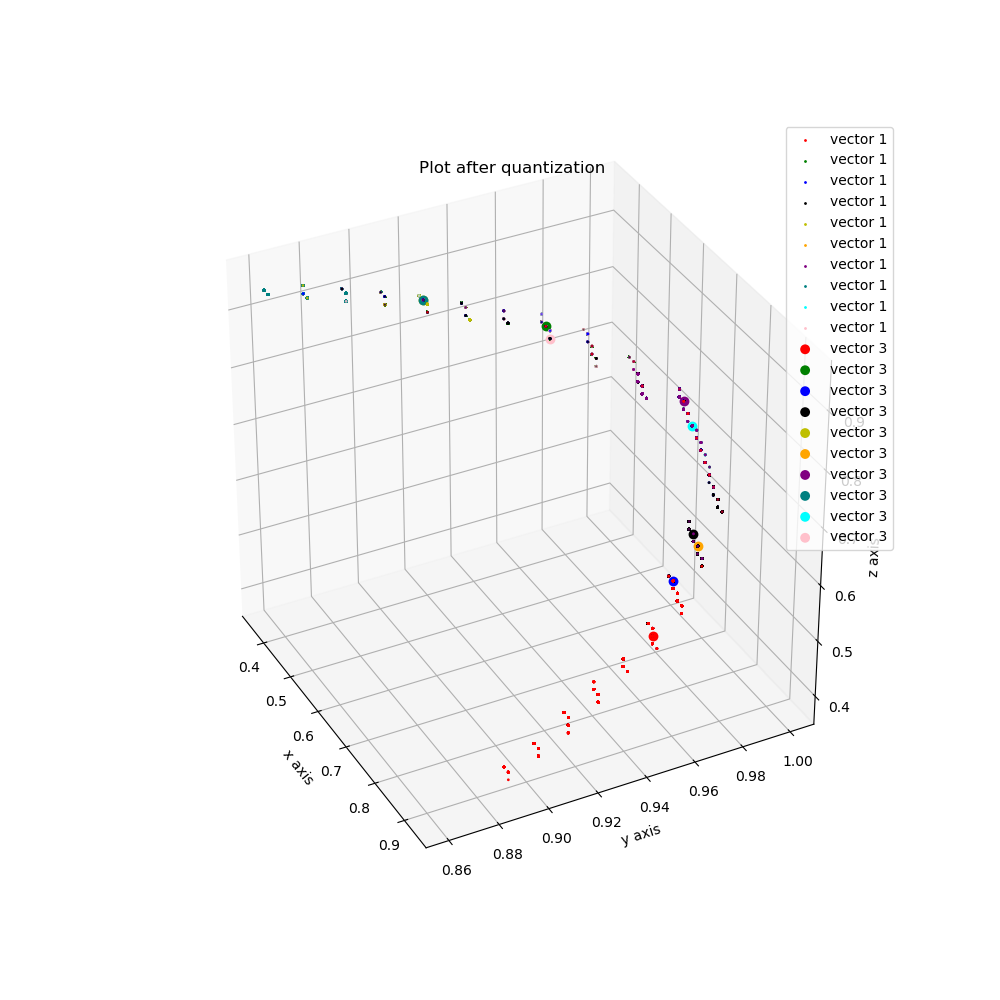

In [51]:
%matplotlib notebook

plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['figure.dpi']=100

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

ax.scatter(V1_fuzz[:,0], V1_fuzz[:,1], V1_fuzz[:,2], c='r', s=1, label='vector 1')
ax.scatter(V2_fuzz[:,0], V2_fuzz[:,1], V2_fuzz[:,2], c='g', s=1, label='vector 1')
ax.scatter(V3_fuzz[:,0], V3_fuzz[:,1], V3_fuzz[:,2], c='b', s=1, label='vector 1')
ax.scatter(V4_fuzz[:,0], V4_fuzz[:,1], V4_fuzz[:,2], c='k', s=1, label='vector 1')
ax.scatter(V5_fuzz[:,0], V5_fuzz[:,1], V5_fuzz[:,2], c='y', s=1, label='vector 1')
ax.scatter(V6_fuzz[:,0], V6_fuzz[:,1], V6_fuzz[:,2], c='orange', s=1, label='vector 1')
ax.scatter(V7_fuzz[:,0], V7_fuzz[:,1], V7_fuzz[:,2], c='purple', s=1, label='vector 1')
ax.scatter(V8_fuzz[:,0], V8_fuzz[:,1], V8_fuzz[:,2], c='teal', s=1, label='vector 1')
ax.scatter(V9_fuzz[:,0], V9_fuzz[:,1], V9_fuzz[:,2], c='cyan', s=1, label='vector 1')
ax.scatter(V10_fuzz[:,0], V10_fuzz[:,1], V10_fuzz[:,2], c='pink', s=1, label='vector 1')

ax.scatter(max_v1[0], max_v1[1], max_v1[2], c='r', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v2[0], max_v2[1], max_v2[2], c='g', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v3[0], max_v3[1], max_v3[2], c='b', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v4[0], max_v4[1], max_v4[2], c='k', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v5[0], max_v5[1], max_v5[2], c='y', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v6[0], max_v6[1], max_v6[2], c='orange', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v7[0], max_v7[1], max_v7[2], c='purple', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v8[0], max_v8[1], max_v8[2], c='teal', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v9[0], max_v9[1], max_v9[2], c='cyan', s=50, label='vector 3', edgecolors='none')
ax.scatter(max_v10[0], max_v10[1], max_v10[2], c='pink', s=50, label='vector 3', edgecolors='none')


ax.legend()
plt.title('Plot after quantization')
plt.show()